<a href="https://colab.research.google.com/github/LovaMarline/Air_Quality_Madagascar/blob/main/Marline_et_al_ERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Analyses of wind direction and source of pollution




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving merged_data.csv to merged_data.csv


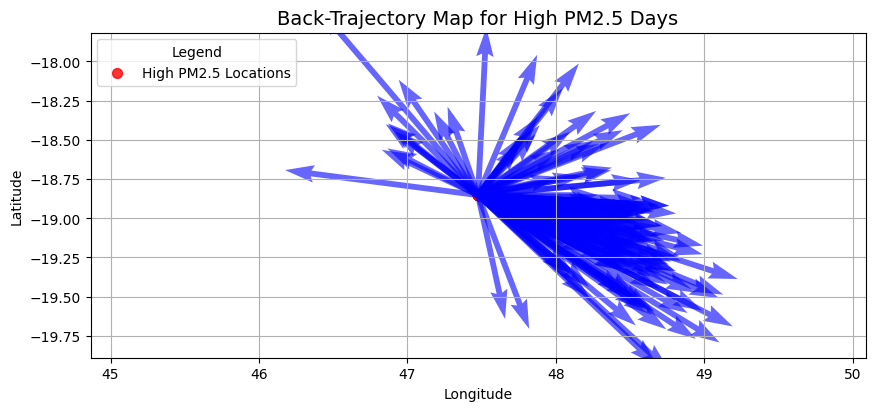

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the uploaded dataset
data = pd.read_csv("merged_data.csv")

# Filter for high PM2.5 days and create a copy to avoid SettingWithCopyWarning
high_pm25_threshold = 35
high_pm25_data = data[data['PM2.5DailyMean'] > high_pm25_threshold].copy()

# Add latitude and longitude (US embassy)
high_pm25_data.loc[:, 'latitude'] = -18.85269  # Default latitude for Antananarivo
high_pm25_data.loc[:, 'longitude'] = 47.47651  # Default longitude for Antananarivo

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    high_pm25_data,
    geometry=gpd.points_from_xy(high_pm25_data['longitude'], high_pm25_data['latitude']),
    crs="EPSG:4326"
)

# Create the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot PM2.5 locations
gdf.plot(ax=ax, color='red', markersize=50, label='High PM2.5 Locations', alpha=0.8)

# Add wind vectors
for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    dx = row['wspd'] * np.sin(np.deg2rad(row['wdir'])) * 0.1  # Adjust scale
    dy = row['wspd'] * np.cos(np.deg2rad(row['wdir'])) * 0.1
    ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.6)

# Customize the map
ax.set_title('Back-Trajectory Map for High PM2.5 Days', fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend(loc='upper left', title='Legend')
plt.grid(True)

plt.show()


In [ ]:
plt.savefig("Back_trajectory_map.png", dpi=300)


<Figure size 640x480 with 0 Axes>

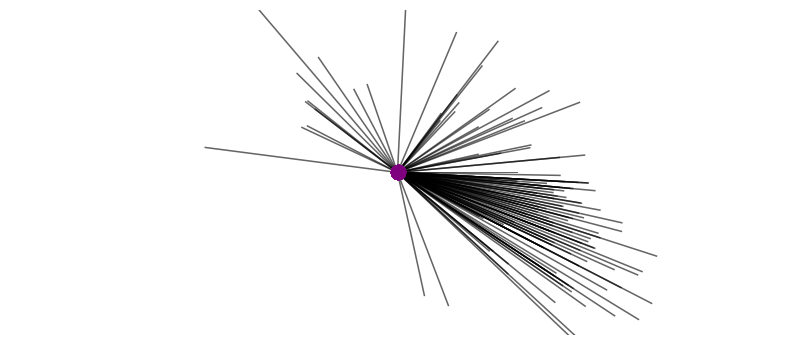

In [ ]:
# Plot and save the map
fig, ax = plt.subplots(figsize=(10, 10))

# Addind wind vectors
for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    dx = row['wspd'] * np.sin(np.deg2rad(row['wdir'])) * 0.1
    dy = row['wspd'] * np.cos(np.deg2rad(row['wdir'])) * 0.1
    ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color='black', alpha=0.6, width=0.002, headaxislength=0, headlength=0, headwidth=0)

# Plot high PM2.5 location
gdf.plot(ax=ax, color='purple', markersize=100, label='High PM2.5 Location', alpha=0.8, zorder=3)

# Remove grid, legend, axis labels, and title
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend().remove()
ax.grid(False)

ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.axis('off')  # turn off the axes, including borders

# Make the background transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Save before displaying the plot
plt.savefig("Back_trajectory_map.png", dpi=300)
plt.show()


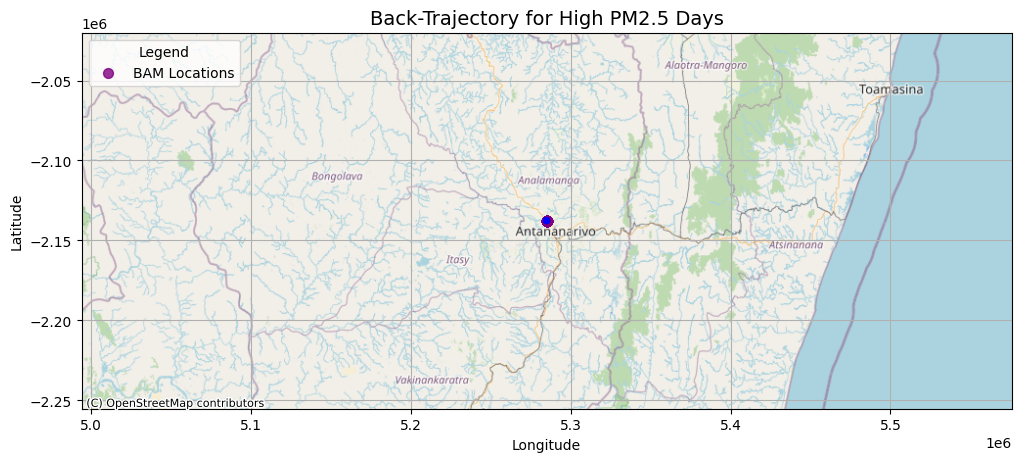

In [ ]:
# Required Libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx

# Load the dataset
data = pd.read_csv("merged_data.csv")

# Filter for high PM2.5 days
high_pm25_threshold = 35
high_pm25_data = data[data['PM2.5DailyMean'] > high_pm25_threshold].copy()  # Avoid Setting with copy warning

# Assign latitude and longitude using .loc
high_pm25_data.loc[:, 'latitude'] = -18.85269
high_pm25_data.loc[:, 'longitude'] = 47.47651

# Convert to GeoDataFrame for mapping
gdf = gpd.GeoDataFrame(
    high_pm25_data,
    geometry=gpd.points_from_xy(high_pm25_data['longitude'], high_pm25_data['latitude']),
    crs="EPSG:4326"
)

# Reproject to Web Mercator for contextily basemaps
gdf = gdf.to_crs(epsg=3857)

# Create the map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot PM2.5 locations
gdf.plot(ax=ax, color='purple', markersize=50, label='BAM Locations', alpha=0.8)

# Add wind vectors with scaling
scaling_factor = 0.01  # Adjust for vector length
for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    if pd.notna(row['wspd']) and pd.notna(row['wdir']):  # Ensure wind data is valid
        dx = row['wspd'] * np.sin(np.deg2rad(row['wdir'])) * scaling_factor
        dy = row['wspd'] * np.cos(np.deg2rad(row['wdir'])) * scaling_factor
        ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.6)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize the map
ax.set_title('Back-Trajectory for High PM2.5 Days', fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend(loc='upper left', title='Legend')
plt.grid(True)

# Save the map to file and display
plt.savefig("Back_trajectory_map_with_basemap.png", dpi=300, bbox_inches='tight')
plt.show()



2.   Analyses of fire



In [1]:
# Install necessary libraries
!pip install geopandas matplotlib pandas

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Upload your CSV file
from google.colab import files
uploaded = files.upload()  # Select your CSV file when prompted



Saving fire_nrt_J1V-C2_551370.csv to fire_nrt_J1V-C2_551370.csv


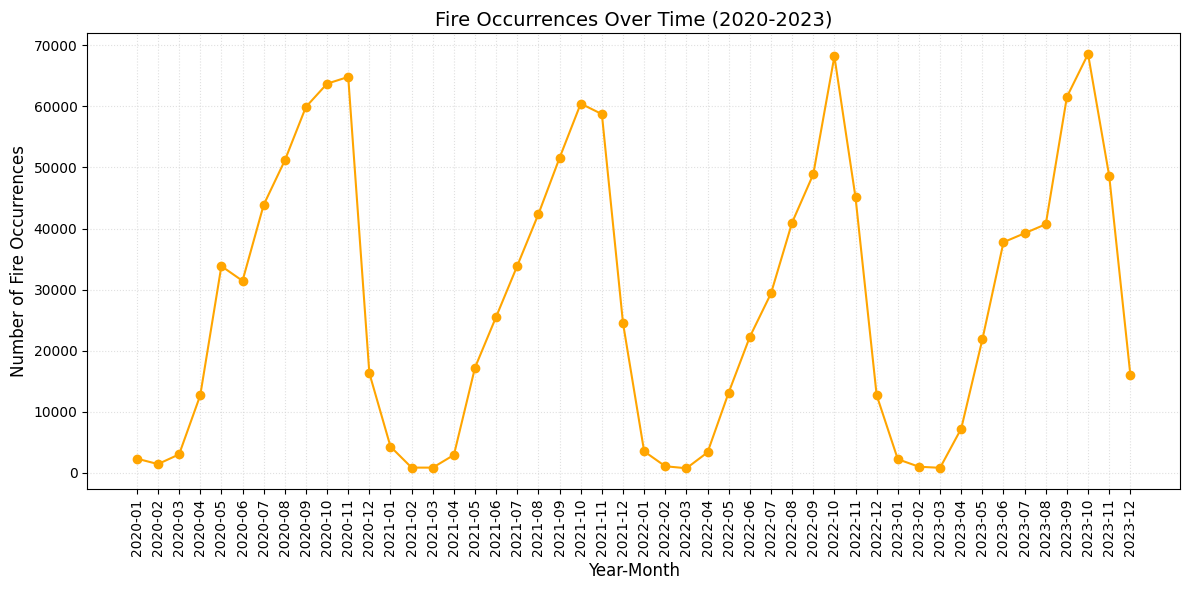

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Load the dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
fire_data = pd.read_csv(file_name)

# Convert 'acq_date' to datetime format
fire_data['acq_date'] = pd.to_datetime(fire_data['acq_date'], errors='coerce')

# Temporal analysis
fire_data['year_month'] = fire_data['acq_date'].dt.to_period('M')
fire_trends = fire_data.groupby('year_month').size()

# Plot temporal trends
plt.figure(figsize=(12, 6))
plt.plot(fire_trends.index.astype(str), fire_trends.values, marker='o', linestyle='-', color='orange')
plt.title('Fire Occurrences Over Time (2020-2023)', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Fire Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle=':', color='lightgrey', alpha=0.7)  # Light grey dotted grid lines
plt.tight_layout()
temporal_trends_path = "temporal_trends_plot.png"
plt.savefig(temporal_trends_path)
plt.show()

# Download the plots
from google.colab import files
files.download(temporal_trends_path)




3. Test fire and PM2.5 correlation

In [6]:
# Install necessary libraries
!pip install pandas matplotlib scikit-learn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Upload fire and PM2.5 data files
from google.colab import files
print("Upload the fire dataset:")
fire_uploaded = files.upload()
print("Upload the PM2.5 dataset:")
pm25_uploaded = files.upload()




Upload the fire dataset:


KeyboardInterrupt: 

Correlation Matrix:
                 total_frp  PM2.5DailyMean  PM2.5DailyMax  PM2.5DailyMin
total_frp        1.000000        0.667963       0.607686       0.623679
PM2.5DailyMean   0.667963        1.000000       0.918706       0.896877
PM2.5DailyMax    0.607686        0.918706       1.000000       0.745691
PM2.5DailyMin    0.623679        0.896877       0.745691       1.000000


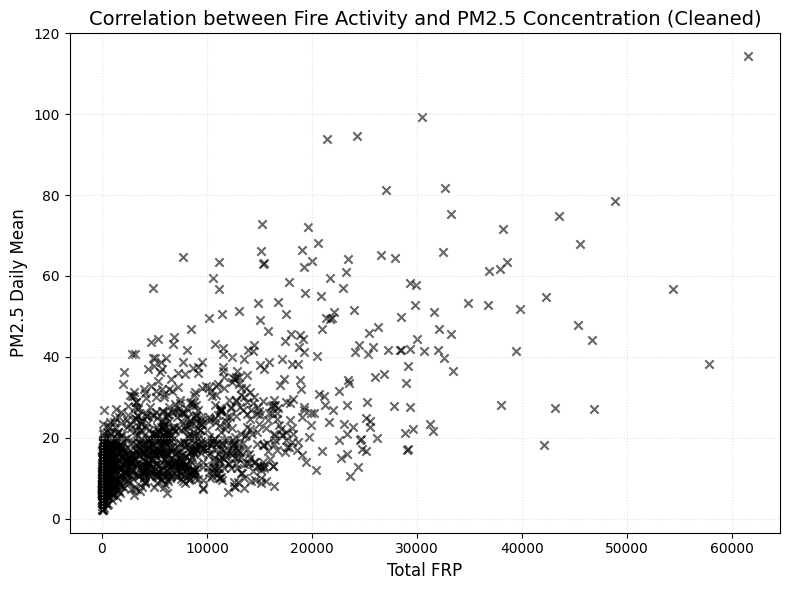


Regression Results:
R-squared: 0.4462
Coefficient: 0.0010
Intercept: 11.8290

Files Saved:
- Scatter Plot: FRP_vs_PM25_cleaned_scatter.png
- Cleaned Dataset: cleaned_fire_pm25_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Load datasets
fire_file_name = list(fire_uploaded.keys())[0]  # Fire data file
pm25_file_name = list(pm25_uploaded.keys())[0]  # PM2.5 data file
fire_data = pd.read_csv(fire_file_name)
pm25_data = pd.read_csv(pm25_file_name)

# Ensure proper datetime format for both datasets
fire_data['acq_date'] = pd.to_datetime(fire_data['acq_date'], errors='coerce')
pm25_data['date'] = pd.to_datetime(pm25_data['date'])

# Aggregate fire data (total FRP) by date
fire_aggregated = fire_data.groupby('acq_date').agg({'frp': 'sum'}).reset_index()
fire_aggregated.rename(columns={'acq_date': 'date', 'frp': 'total_frp'}, inplace=True)

# Merge the fire and PM2.5 datasets on the date column
merged_data = pd.merge(fire_aggregated, pm25_data, on='date', how='inner')

# Remove rows with negative PM2.5 values
merged_data_cleaned = merged_data[(merged_data['PM2.5DailyMean'] >= 0) &
                                  (merged_data['PM2.5DailyMax'] >= 0) &
                                  (merged_data['PM2.5DailyMin'] >= 0)]

# Calculate correlation matrix
correlation_matrix = merged_data_cleaned[['total_frp', 'PM2.5DailyMean', 'PM2.5DailyMax', 'PM2.5DailyMin']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Scatter plot: Total FRP vs PM2.5 Daily Mean
plt.figure(figsize=(8, 6))
plt.scatter(merged_data_cleaned['total_frp'], merged_data_cleaned['PM2.5DailyMean'],  alpha=0.6, c='black', marker='x')
plt.title('Correlation between Fire Activity and PM2.5 Concentration (Cleaned)', fontsize=14)
plt.xlabel('Total FRP', fontsize=12)
plt.ylabel('PM2.5 Daily Mean', fontsize=12)
plt.grid(True, linestyle=':', color='lightgrey', alpha=0.7)
plt.tight_layout()
plt.savefig("FRP_vs_PM25_cleaned_scatter.png")
plt.show()

# Regression analysis
X = merged_data_cleaned[['total_frp']]  # Independent variable
y = merged_data_cleaned['PM2.5DailyMean']  # Dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print regression results
print("\nRegression Results:")
print(f"R-squared: {model.score(X, y):.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Save scatter plot and export cleaned dataset
merged_data_cleaned.to_csv("cleaned_fire_pm25_data.csv", index=False)
print("\nFiles Saved:")
print("- Scatter Plot: FRP_vs_PM25_cleaned_scatter.png")
print("- Cleaned Dataset: cleaned_fire_pm25_data.csv")

# Provide download links
from google.colab import files
files.download("FRP_vs_PM25_cleaned_scatter.png")
files.download("cleaned_fire_pm25_data.csv")